# Data Mining: K-means, DBSCAN and Hierarchical Clustering
## Partitioning clustering:  k-means

Code taken from CEGE0042: Spatial-Temporal Data Analysis and Data Mining (STDM)tutorial material created By Dr James Haworth
Lecturer, Dept of Civil, Environ &Geomatic Eng Faculty of Engineering Science

In [ ]:
# install.packages('fields')
# install.packages('dotCall64')

install.packages('dbscan')
install.packages('dotCall64')
install.packages('fields')

In [ ]:
library(dbscan)
library(dotCall64)
library(fields)

In [15]:
mykmeans <- function(data, k, max.iter=10)
{
  # A function for carrying out k-means clustering
  # Inputs:
  #  data: data matrix/data frame with n rows and p columns, where n
  #  is the number of observations and p the number of variables 
  #  k: the number of clusters that are sought
  #  max.iter: the number of iterations before stopping the algorithm
  # Outputs:
  #  centres: the coordinates of the cluster centres
  #  clusters: the cluster that each data point is assigned to.
  
  require(fields)
  # randomly select centres
  centres <- data[sample(1:nrow(data), k),] 
  # create empty matrix to store distance calculations
  dists <- matrix(0, nrow(data), k+1) 
  for (i in 1:max.iter)
  {
    for(j in 1:k)
    {
      # Calculate Euclidean distance from points to cluster centres
      dists[,j] <- rdist(data, centres[j,,drop=F]) 
    }
    # Find nearest centre for each data point (minimum distance)
    dists[,k+1] <- apply(dists[,c(1:k)], 1, which.min) 
    # recalculate centres as mean of points contained in each cluster
    centres <- aggregate(data, list(dists[,k+1]), mean)[,-1]
  }
  return(list(centres=centres, clusters=dists[,k+1]))
}

In [16]:
set.seed(100)


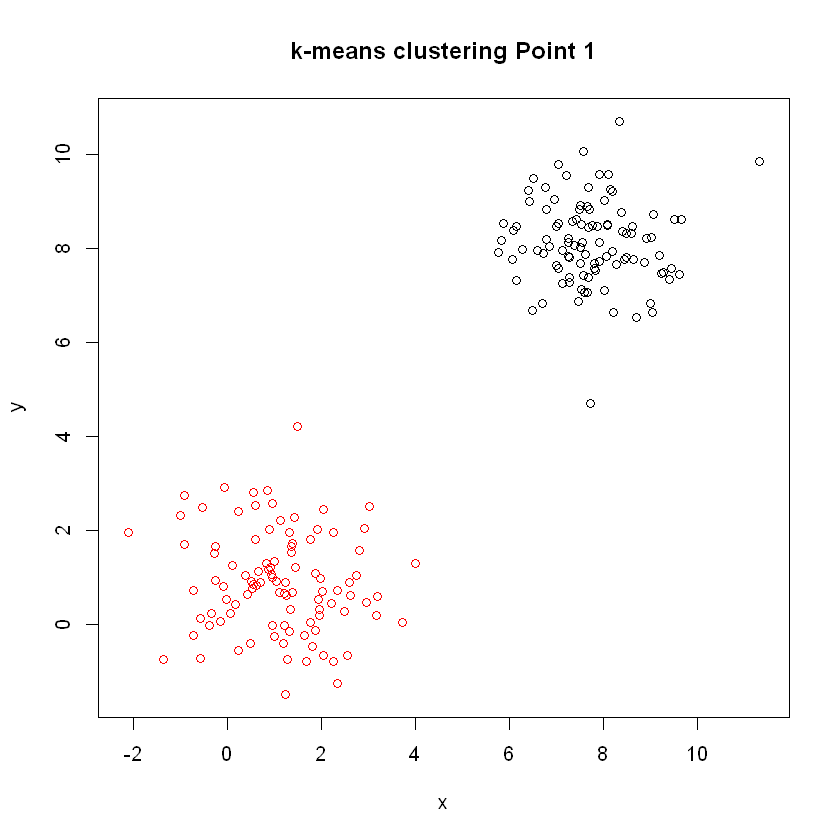

In [26]:
# Generate simulated data
points1 <- rbind(cbind(rnorm(100, 1), rnorm(100, 1)), cbind(rnorm(100, 8), rnorm(100, 8)))
# Run k-means
points1_kmeans <- mykmeans(points1, k=2, max.iter=100)
# Plot the resulting clusters (colour represents cluster membership)
 plot(points1, col=points1_kmeans$clusters, asp=1, xlab="x", ylab="y",main="k-means clustering Point 1")

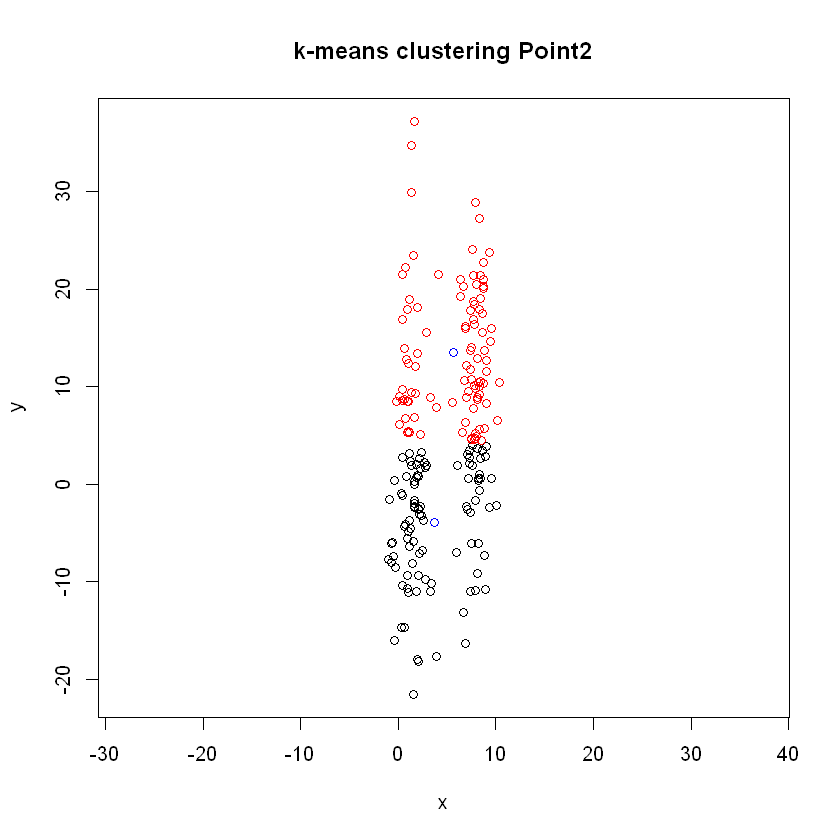

In [18]:
# Generate simulated data
points2 <- rbind(cbind(rnorm(100, 1,1), rnorm(100, 1,10)), cbind(rnorm(100, 8,1), rnorm(100, 8,10)))
# Run k-means
points2_kmeans <- mykmeans(points2, 2, 100)
# Plot the resulting clusters
plot(points2, col=points2_kmeans$clusters, asp=1, xlab="x", ylab="y",main="k-means clustering Point2")
points(points2_kmeans$centres, col="blue")

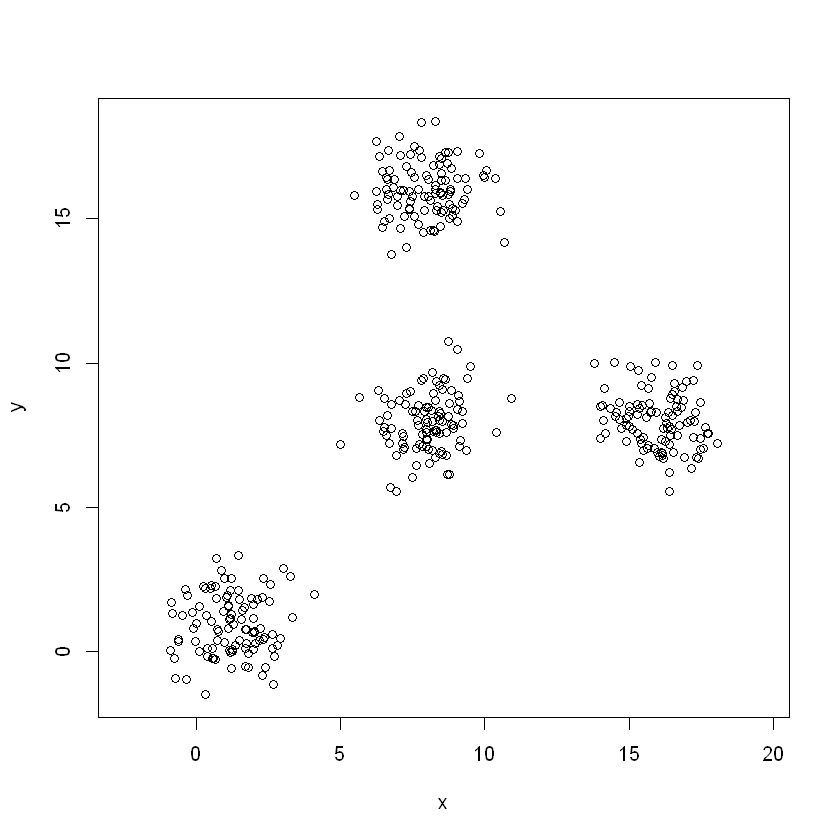

In [19]:
# points4 <- rbind(cbind(rnorm(100, 1), rnorm(100, 1)), 

points4 <- rbind(cbind(rnorm(100, 1), rnorm(100, 1)), 
                 cbind(rnorm(100, 8), rnorm(100, 8)),
                 cbind(rnorm(100, 16), rnorm(100, 8)),
                 cbind(rnorm(100, 8), rnorm(100, 16))
)
plot(points4, asp=1, xlab="x", ylab="y")


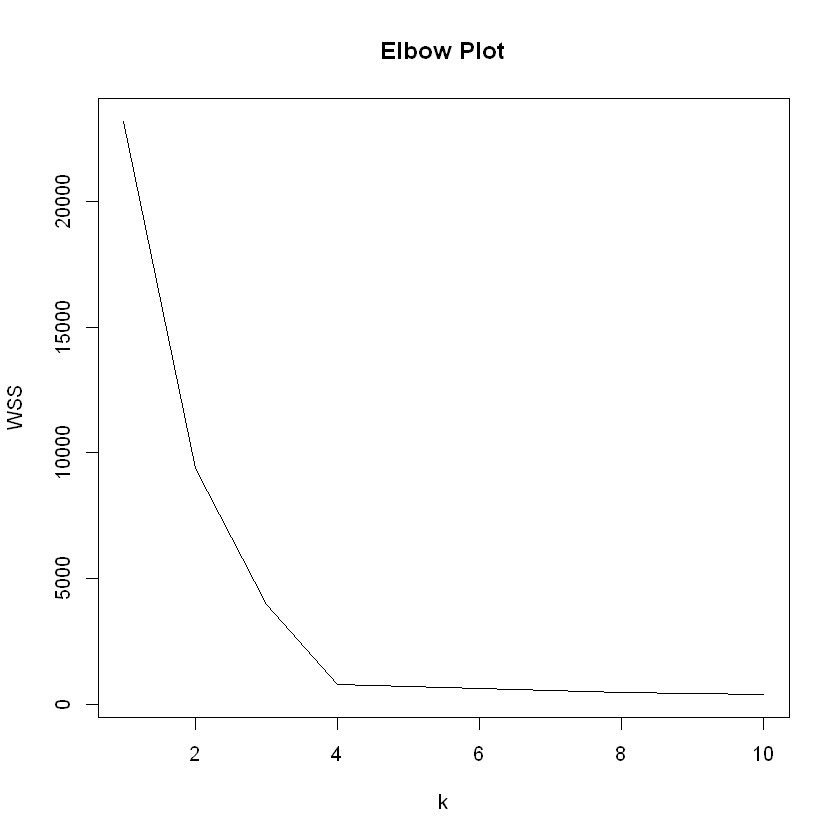

In [20]:
k.max <- 10 # Set maximum number of clusters.
# Apply k-means for each value of k and save the total within SS only
wss <- sapply(1:k.max, function(k){kmeans(points4, k, nstart=50,iter.max = 15 )$tot.withinss})
# Plot the elbow plot
plot(wss, type="l", xlab="k", ylab="WSS",main="Elbow Plot")


Optimum Value is 4 clusters.

# DBSCAN

In [21]:
library(dbscan)


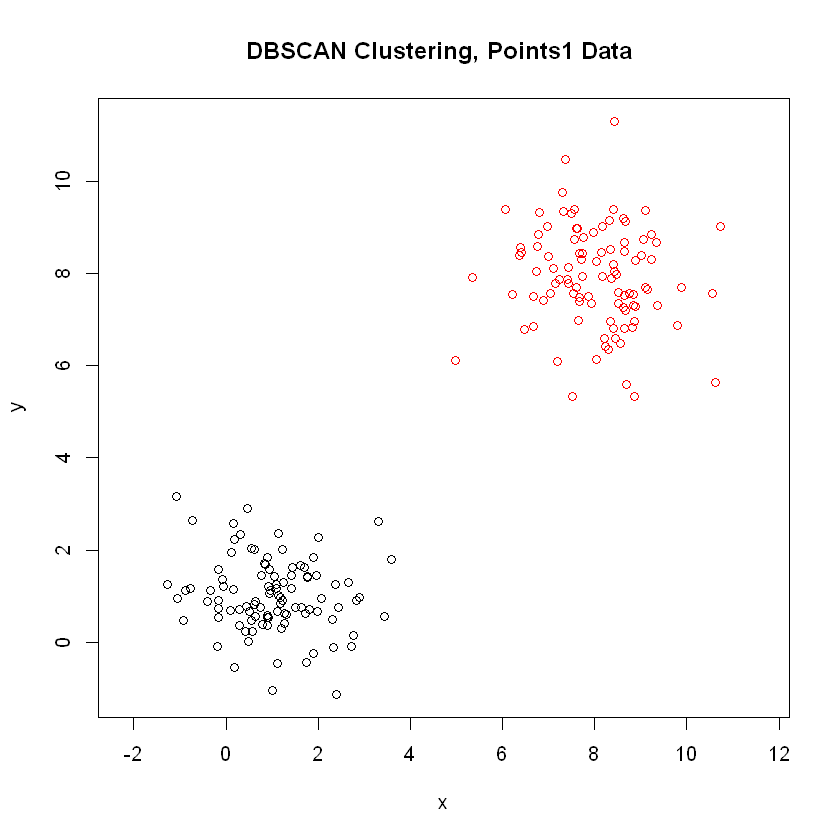

In [22]:
points1_dbscan <- dbscan(points1, eps=3, minPts=10)
plot(points1, col=points1_dbscan$cluster, asp=1, xlab="x", ylab="y",main="DBSCAN Clustering, Points1 Data ")

Applying DBSCAN to the points2 dataset.

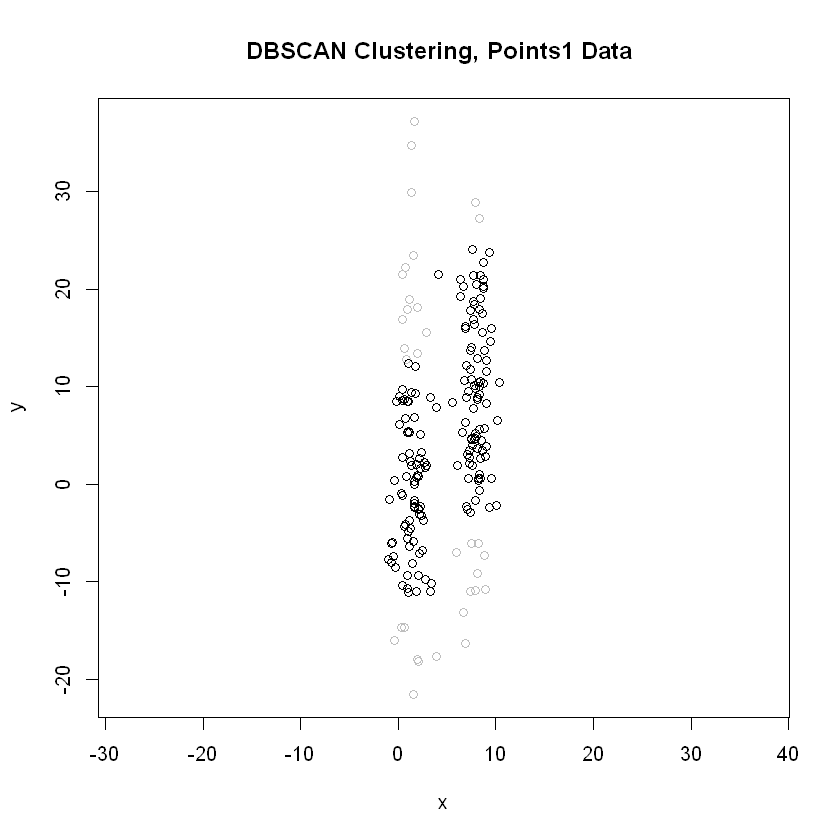

In [23]:
points2_dbscan <- dbscan(points2, eps=3, minPts=10)
# Assign the noise points to cluster number an arbitrarily high number for the plot
points2_dbscan$cluster[which(points2_dbscan$cluster==0)] <- 1000
plot(points2, col=points2_dbscan$cluster, asp=1, xlab="x", ylab="y",main="DBSCAN Clustering, Points1 Data ")

# Hierarchical Clustering

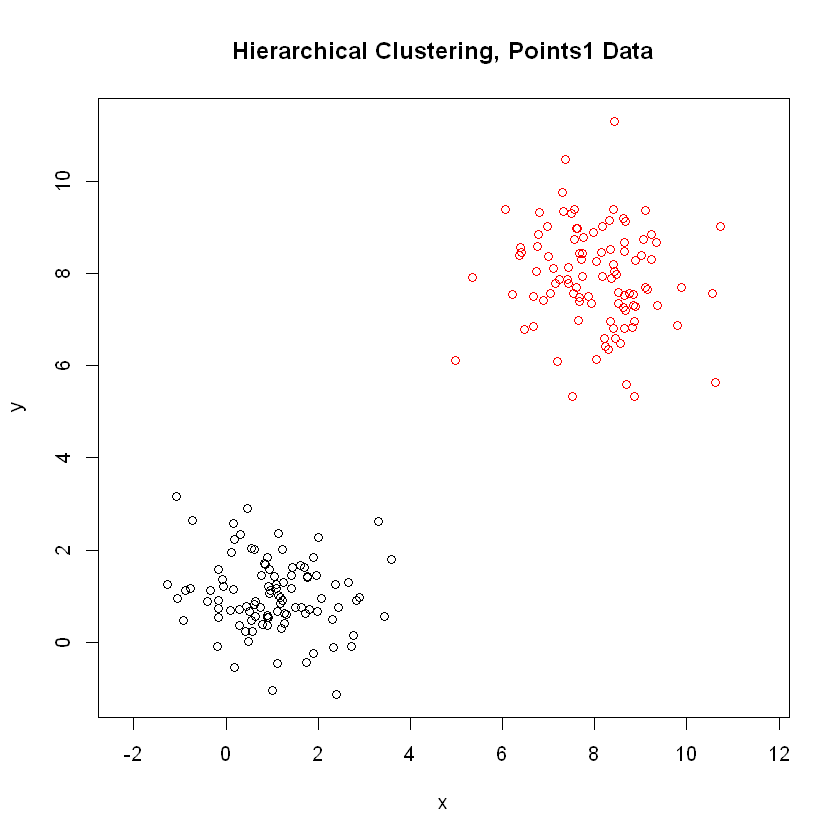

In [24]:
# Use agglomerative hierarchical clustering on points1 dataset
points1_hclust <- hclust(dist(points1))
# Plot the result, showing 2 clusters
plot(points1, col=cutree(points1_hclust, 2), asp=1, xlab="x", ylab="y",main="Hierarchical Clustering, Points1 Data" )

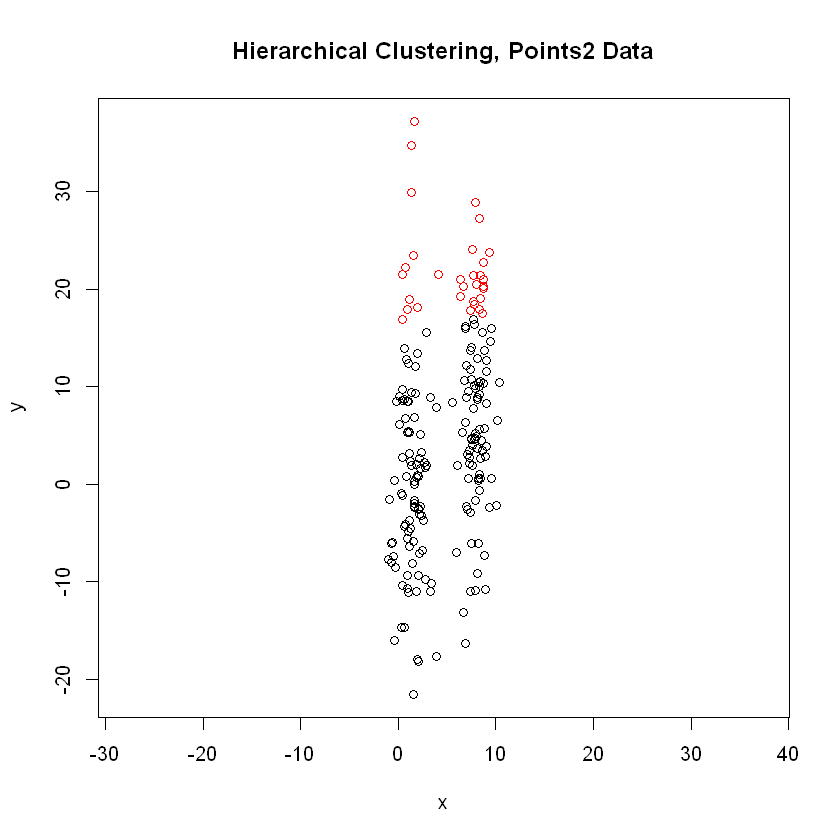

In [25]:
# Use agglomerative hierarchical clustering on points1 dataset
points2_hclust <- hclust(dist(points2))
# Plot the result, showing 2 clusters
plot(points2, col=cutree(points2_hclust, 2), asp=1, xlab="x", ylab="y",main="Hierarchical Clustering, Points2 Data" )